In [37]:
from PIL import Image
import numpy as np
import tensorflow as tf
# import keras
# from keras import backend as K
# from keras.models import Model
# from keras.layers import Dense, Input, BatchNormalization, Activation, merge, Flatten
# from keras.layers import Convolution2D, SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline

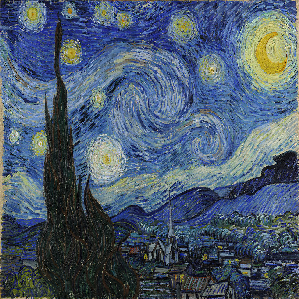

In [38]:
im = Image.open('starry_night.jpg')
im2 = im.resize([299,299])
style = np.array(im2,dtype=np.float32).reshape((299,299,3))
im2

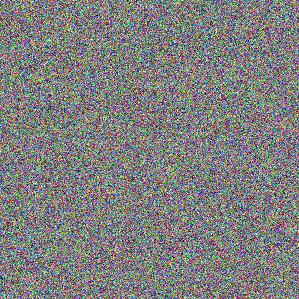

In [39]:
wn = np.clip((np.random.randn(299,299,3)*np.sqrt(255.0)*4)+255.0/2,0,255)
Image.fromarray(np.uint8(wn.reshape(299,299,3)))

In [111]:
g = tf.Graph()
with g.as_default():
    #img_input = tf.placeholder(dtype=tf.float32,shape=(299,299,3))
    target = tf.constant(style,dtype=tf.float32)
    
    #image to be altered
    #alter = tf.Variable(initial_value=img_input)
    alter = tf.Variable(initial_value=wn,dtype=tf.float32)
    
    loss = tf.reduce_mean(tf.square(alter - target))
    
    train = tf.train.GradientDescentOptimizer(1).minimize(loss)
    
    
    init = tf.global_variables_initializer()

In [112]:
sess = tf.Session(graph=g)
sess.run(init)
#sess.run([init],feed_dict={img_input:wn,target:style})
losses=[]

In [119]:
num_steps = 100000
for i in tqdm(range(num_steps)):
    l,_=sess.run([loss,train])
    losses.append(l)
after = sess.run(alter)

100%|██████████| 100000/100000 [00:48<00:00, 2045.42it/s]


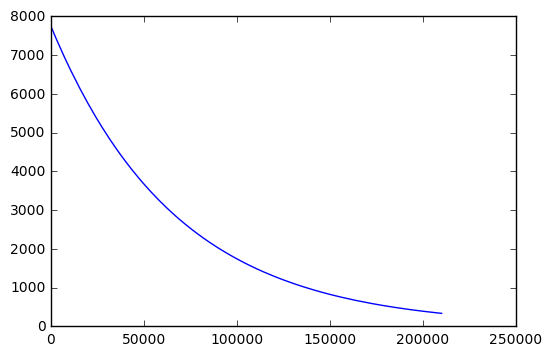

In [120]:
plt.plot(losses)

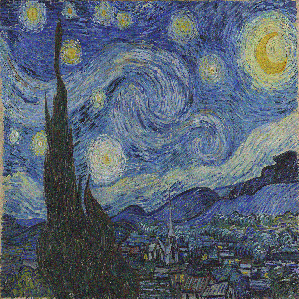

In [121]:
Image.fromarray(np.uint8(after))

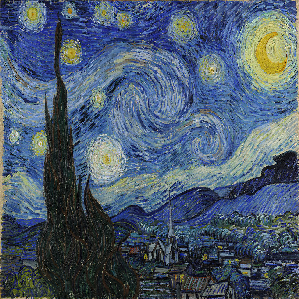

In [122]:
Image.fromarray(np.uint8(style))